# Introduction to Supervised Learning
Imagine a teacher (our computer model) trying to learn from a student's textbook (our data). In Supervised Learning, this textbook comes with answers (labels) for each question. The teacher's goal is to learn the rules from these examples so well that it can predict the answer to new, unseen questions (new data) accurately. We 'supervise' the learning process by providing the correct answers, guiding the model to understand the patterns within the data.

## Phase 1: Simple Linear Regression Explanation

Imagine we want to predict a person's salary based on their years of experience. Simple Linear Regression is like a straightforward recipe for a cake: 'One cause, one effect'. It helps us understand how one factor (like 'Years of Experience') directly influences another (like 'Salary').

The core idea is to find a straight line that best fits our data. This line can then be used to make predictions. The formula for this line is often written as:

$y = mx + c$

Think of this like a 'Recipe for a Cake':

*   **y (Salary)**: This is what we want to predict – our 'cake'.
*   **x (Years of Experience)**: This is the ingredient we know – our 'flour'.
*   **m (Slope)**: This tells us how much 'y' changes for every unit change in 'x'. It's like how much the cake rises for each cup of flour. A positive 'm' means more experience leads to higher salary. It's the 'secret ingredient' ratio.
*   **c (Y-intercept)**: This is the starting point, the baseline salary even with zero experience. It's like the basic flavor of the cake before adding any special ingredients.

So, Simple Linear Regression finds the perfect 'm' and 'c' to draw the best straight line through our data, allowing us to predict 'y' from 'x' as accurately as possible.

## Phase 1: Simple Linear Regression Explanation

Imagine we want to predict a person's salary based on their years of experience. Simple Linear Regression is like a straightforward recipe for a cake: 'One cause, one effect'. It helps us understand how one factor (like 'Years of Experience') directly influences another (like 'Salary').

The core idea is to find a straight line that best fits our data. This line can then be used to make predictions. The formula for this line is often written as:

$y = mx + c$

Think of this like a 'Recipe for a Cake':

*   **y (Salary)**: This is what we want to predict – our 'cake'.
*   **x (Years of Experience)**: This is the ingredient we know – our 'flour'.
*   **m (Slope)**: This tells us how much 'y' changes for every unit change in 'x'. It's like how much the cake rises for each cup of flour. A positive 'm' means more experience leads to higher salary. It's the 'secret ingredient' ratio.
*   **c (Y-intercept)**: This is the starting point, the baseline salary even with zero experience. It's like the basic flavor of the cake before adding any special ingredients.

So, Simple Linear Regression finds the perfect 'm' and 'c' to draw the best straight line through our data, allowing us to predict 'y' from 'x' as accurately as possible.

The first step is to import all the necessary libraries: pandas for data manipulation, `LinearRegression` for the model, `train_test_split` for data splitting, and `matplotlib.pyplot` for plotting.



In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

print("Libraries imported successfully.")

Libraries imported successfully.


Dataset loaded successfully.
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
Data split into training and testing sets successfully.
Linear Regression model trained successfully.


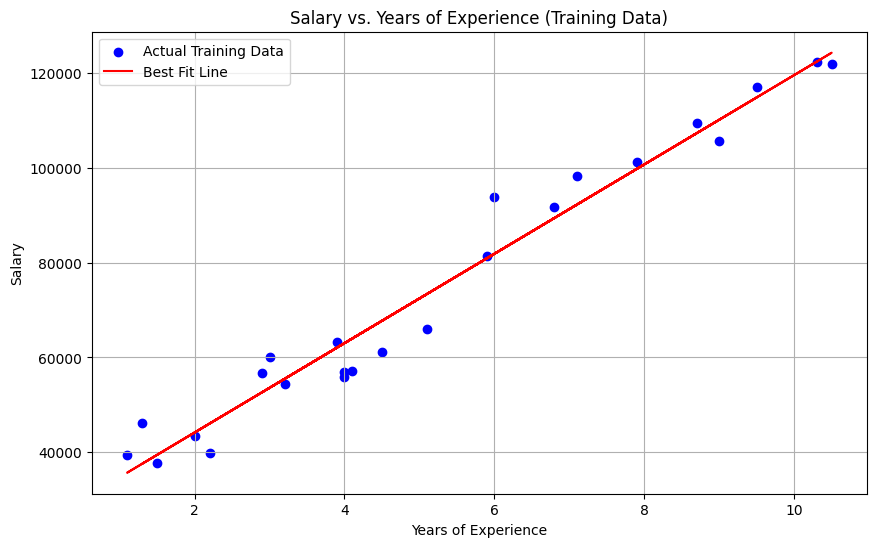

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/Salary_Data.csv')
print("Dataset loaded successfully.")
print(df.head())

# 4. Separate features (X) and target (y)
X = df[['YearsExperience']]
y = df['Salary']

# 5. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets successfully.")

# 6. Initialize a LinearRegression model
model = LinearRegression()

# 7. Train the model using the training data
model.fit(X_train, y_train)
print("Linear Regression model trained successfully.")

# 8. Create a scatter plot of the original training data
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual Training Data')

# 9. Plot the regression line on top of the scatter plot
plt.plot(X_train, model.predict(X_train), color='red', label='Best Fit Line')

# 10. Add appropriate labels and title
plt.title('Salary vs. Years of Experience (Training Data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

# 11. Display the plot
plt.grid(True)
plt.show()

## Ridge Regression: Adding 'Brakes' to Our Model

Imagine you're trying to predict house prices, but there are so many factors (like number of bedrooms, size of the yard, distance to schools, crime rates, etc.) that sometimes overlap or even contradict each other. This can make our model, like a car, get 'too excited' and try to find overly complex explanations for every tiny detail in the data, leading to an unstable prediction. This is especially true when data is 'noisy' (has errors or irrelevant information).

**Ridge Regression is like adding reliable 'brakes' to our model.** Instead of letting the model freely adjust to every fluctuation in the data, Ridge Regression gently applies pressure to the 'weights' (the importance) of each factor. It penalizes large or overly enthusiastic coefficients, effectively shrinking them towards zero. This prevents the model from becoming too complex or sensitive to minor data variations.

### How it helps with House Prices:
*   **Prevents Overfitting:** By toning down the influence of any single noisy or highly correlated feature, Ridge Regression ensures the model doesn't "memorize" the training data but rather learns more general patterns.
*   **Handles Multicollinearity:** When many factors are highly related (e.g., house size and number of rooms are often connected), a normal Linear Regression might struggle. Ridge Regression handles these "overlapping" factors better, making the model more stable.
*   **More Reliable Predictions:** By reining in complexity, the model becomes more robust and makes more stable, trustworthy predictions for house prices, even when faced with new, slightly different data.

In essence, Ridge Regression sacrifices a tiny bit of training accuracy to gain significant improvements in the model's stability and ability to generalize to new, unseen houses.

The first step in implementing Ridge Regression is to load the specified housing dataset into a pandas DataFrame and then display the first few rows to confirm it loaded correctly and understand its structure, as instructed.



In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# 1. Load the housing dataset
df_housing = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
print("Housing dataset loaded successfully.")
print(df_housing.head())

Housing dataset loaded successfully.
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


The dataset has been successfully loaded. The next logical step is to separate the features and target variable, split the data into training and testing sets, initialize and train the Ridge Regression model, make predictions, and then visualize its performance with a prediction error plot, as detailed in the subtask instructions.



Features (X_housing) and target (y_housing) separated successfully.
Housing data split into training and testing sets successfully.
Ridge Regression model initialized.
Ridge Regression model trained successfully.
Predictions made on the test set.


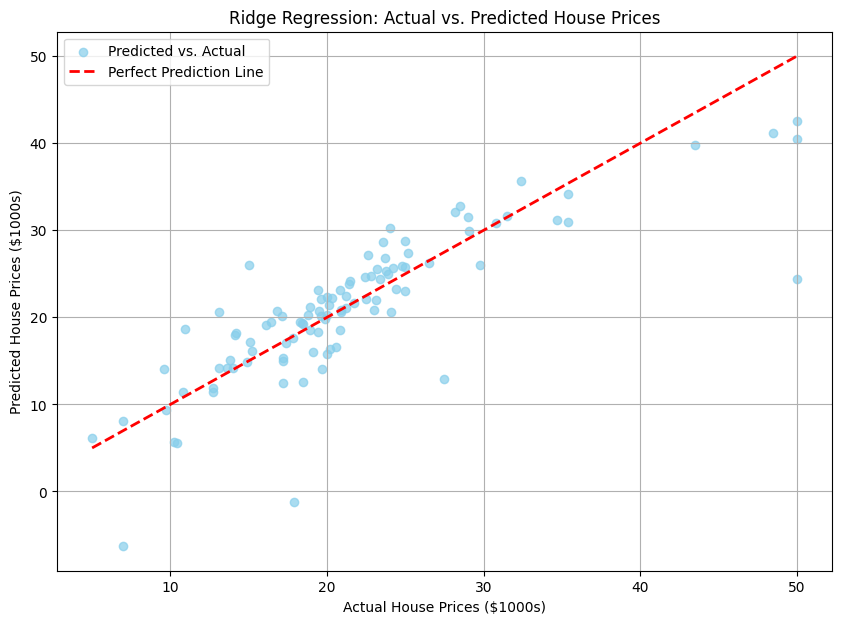

In [27]:
X_housing = df_housing.drop('medv', axis=1)
y_housing = df_housing['medv']
print("Features (X_housing) and target (y_housing) separated successfully.")

X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)
print("Housing data split into training and testing sets successfully.")

ridge_model = Ridge(alpha=1.0)
print("Ridge Regression model initialized.")

ridge_model.fit(X_train_housing, y_train_housing)
print("Ridge Regression model trained successfully.")

y_pred_ridge = ridge_model.predict(X_test_housing)
print("Predictions made on the test set.")

plt.figure(figsize=(10, 7))
plt.scatter(y_test_housing, y_pred_ridge, alpha=0.7, color='skyblue', label='Predicted vs. Actual')
plt.plot([y_test_housing.min(), y_test_housing.max()], [y_test_housing.min(), y_test_housing.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual House Prices ($1000s)')
plt.ylabel('Predicted House Prices ($1000s)')
plt.title('Ridge Regression: Actual vs. Predicted House Prices')
plt.legend()
plt.grid(True)
plt.show()


## Lasso Regression: The 'Declutterer' for Complex Predictions

Imagine you're a sports agent trying to predict an athlete's salary, but you have a massive spreadsheet with tons of information about them: their height, weight, age, years pro, goals scored, assists, penalty minutes, popularity on social media, favorite color, shoe size, and hundreds of other details. Many of these details might seem useful, but some are likely irrelevant or even misleading for predicting salary.

**Lasso Regression is like a super-efficient 'Declutterer' for our prediction model.** In a dataset with many columns (features), some features contribute little to predicting the outcome (like 'favorite color' for salary). Instead of just reducing the importance of these 'useless' details, Lasso Regression takes a bolder step: it identifies truly irrelevant features and effectively **sets their influence (their coefficient) completely to zero**.

### How it helps with Athlete Salaries:
*   **Feature Selection:** Lasso automatically picks out the most important factors for predicting salary, discarding the noise. This means you end up with a simpler, more interpretable model focusing only on what truly matters (e.g., perhaps goals scored and years pro, but not shoe size).
*   **Prevents Overfitting:** By aggressively removing less important features, Lasso prevents the model from trying to fit every tiny, random fluctuation in the training data. This leads to a model that generalizes better to new, unseen athletes.
*   **Simpler Model:** A model with fewer features is easier to understand and explain. You can confidently say, "These 5 factors are what truly drive an athlete's salary," rather than trying to make sense of hundreds of tiny influences.

In essence, Lasso Regression helps us build a lean, focused model that cuts through the clutter, giving us clear and effective predictions for athlete salaries.

## Lasso Regression Implementation

Download the athlete salary data, handle missing values, split the data, train a Lasso Regression model, and identify important features.


The first step in implementing Lasso Regression is to load the specified athlete salary dataset into a pandas DataFrame named `df_hitters` and then display the first few rows to confirm it loaded correctly and understand its structure, as instructed.



In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

df_hitters = pd.read_csv('https://raw.githubusercontent.com/kirenz/datasets/master/Hitters.csv')
print("Athlete salary dataset loaded successfully.")
print(df_hitters.head())

Athlete salary dataset loaded successfully.
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N  


The next step is to handle missing values by dropping rows with NaN, separate features and the target variable, and then apply one-hot encoding to categorical features, as specified in the instructions. These are all data preprocessing steps.



In [29]:
df_hitters.dropna(inplace=True)
print("Missing values handled successfully by dropping rows.")

X_hitters = df_hitters.drop('Salary', axis=1)
y_hitters = df_hitters['Salary'].values
print("Features (X_hitters) and target (y_hitters) separated successfully.")

X_hitters = pd.get_dummies(X_hitters, drop_first=True)
print("Categorical features converted to numerical using one-hot encoding.")
print("Processed X_hitters head:")
print(X_hitters.head())

Missing values handled successfully by dropping rows.
Features (X_hitters) and target (y_hitters) separated successfully.
Categorical features converted to numerical using one-hot encoding.
Processed X_hitters head:
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   
5    594   169      4    74   51     35     11    4408   1133      19    501   

   CRBI  CWalks  PutOuts  Assists  Errors  League_N  Division_W  NewLeague_N  
1   414     375      632       43      10      True        True         True  
2   266     263      880       82      14     False        True        False  
3   838     354      200       11       3      True       False   

The data has been preprocessed by handling missing values and one-hot encoding categorical features. The next step is to split the data into training and testing sets, initialize and train a Lasso Regression model, and then identify features with non-zero coefficients to determine their importance, as per the subtask instructions.



In [30]:
X_train_hitters, X_test_hitters, y_train_hitters, y_test_hitters = train_test_split(X_hitters, y_hitters, test_size=0.2, random_state=42)
print("Data split into training and testing sets successfully.")

lasso_model = Lasso(alpha=1.0)
print("Lasso Regression model initialized with alpha=1.0.")

lasso_model.fit(X_train_hitters, y_train_hitters)
print("Lasso Regression model trained successfully.")

# Identify important features (non-zero coefficients)
important_features = X_hitters.columns[lasso_model.coef_ != 0]
ignored_features = X_hitters.columns[lasso_model.coef_ == 0]

print("\nFeatures kept by Lasso (non-zero coefficients):")
for feature, coef in zip(important_features, lasso_model.coef_[lasso_model.coef_ != 0]):
    print(f"  {feature}: {coef:.3f}")

print("\nFeatures ignored by Lasso (zero coefficients):")
for feature in ignored_features:
    print(f"  {feature}")

Data split into training and testing sets successfully.
Lasso Regression model initialized with alpha=1.0.
Lasso Regression model trained successfully.

Features kept by Lasso (non-zero coefficients):
  AtBat: -1.462
  Hits: 7.256
  HmRun: 4.304
  Runs: -2.650
  RBI: -1.296
  Walks: 5.460
  Years: 8.569
  CAtBat: -0.249
  CHits: 0.204
  CHmRun: -0.314
  CRuns: 1.623
  CRBI: 0.886
  CWalks: -0.786
  PutOuts: 0.247
  Assists: 0.229
  Errors: -0.571
  League_N: 79.781
  Division_W: -109.339
  NewLeague_N: -35.396

Features ignored by Lasso (zero coefficients):


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.948e+06, tolerance: 4.367e+03
  model = cd_fast.enet_coordinate_descent(


The previous Lasso Regression model training produced a `ConvergenceWarning`, suggesting issues with feature scaling or regularization. To address this, I will add feature scaling using `StandardScaler` to standardize the input features `X_hitters` before splitting the data and training the Lasso model. This often improves convergence and model stability for regularized linear models.



In [31]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_hitters_scaled = scaler.fit_transform(X_hitters)

X_train_hitters, X_test_hitters, y_train_hitters, y_test_hitters = train_test_split(X_hitters_scaled, y_hitters, test_size=0.2, random_state=42)
print("Data split into training and testing sets successfully.")

lasso_model = Lasso(alpha=1.0, max_iter=10000) # Increased max_iter to ensure convergence
print("Lasso Regression model initialized with alpha=1.0 and max_iter=10000.")

lasso_model.fit(X_train_hitters, y_train_hitters)
print("Lasso Regression model trained successfully.")

# Identify important features (non-zero coefficients)
# Access column names from the original (unscaled) X_hitters DataFrame
important_features = X_hitters.columns[lasso_model.coef_ != 0]
ignored_features = X_hitters.columns[lasso_model.coef_ == 0]

print("\nFeatures kept by Lasso (non-zero coefficients):")
for feature, coef in zip(important_features, lasso_model.coef_[lasso_model.coef_ != 0]):
    print(f"  {feature}: {coef:.3f}")

print("\nFeatures ignored by Lasso (zero coefficients):")
for feature in ignored_features:
    print(f"  {feature}")

Data split into training and testing sets successfully.
Lasso Regression model initialized with alpha=1.0 and max_iter=10000.
Lasso Regression model trained successfully.

Features kept by Lasso (non-zero coefficients):
  AtBat: -216.245
  Hits: 299.973
  HmRun: 12.566
  Runs: -32.848
  RBI: -0.991
  Walks: 102.426
  CAtBat: -229.054
  CRuns: 395.745
  CRBI: 203.667
  CWalks: -176.054
  PutOuts: 70.164
  Assists: 20.270
  Errors: -5.937
  League_N: 41.860
  Division_W: -56.355
  NewLeague_N: -21.836

Features ignored by Lasso (zero coefficients):
  Years
  CHits
  CHmRun


To compare the models, I need to calculate their Mean Squared Error (MSE) and R-squared scores. I will start by importing the necessary functions from `sklearn.metrics` and then proceed to calculate these metrics for each trained model using their respective test sets and predictions.



In [32]:
from sklearn.metrics import mean_squared_error, r2_score

# 2. Calculate predictions for the Linear Regression model on its test set
y_pred_linear = model.predict(X_test)

# 3. Calculate the Mean Squared Error (MSE) and R-squared score for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Linear Regression - MSE: {mse_linear:.2f}, R-squared: {r2_linear:.2f}")

# 4. Calculate the Mean Squared Error (MSE) and R-squared score for Ridge Regression
mse_ridge = mean_squared_error(y_test_housing, y_pred_ridge)
r2_ridge = r2_score(y_test_housing, y_pred_ridge)
print(f"Ridge Regression - MSE: {mse_ridge:.2f}, R-squared: {r2_ridge:.2f}")

# 5. Calculate predictions for the Lasso Regression model on its scaled test set
y_pred_lasso = lasso_model.predict(X_test_hitters)

# 6. Calculate the Mean Squared Error (MSE) and R-squared score for Lasso Regression
mse_lasso = mean_squared_error(y_test_hitters, y_pred_lasso)
r2_lasso = r2_score(y_test_hitters, y_pred_lasso)
print(f"Lasso Regression - MSE: {mse_lasso:.2f}, R-squared: {r2_lasso:.2f}")

# 7. Create a Pandas DataFrame to display these metrics
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'Mean Squared Error': [mse_linear, mse_ridge, mse_lasso],
    'R-Squared': [r2_linear, r2_ridge, r2_lasso]
})
comparison_df.set_index('Model', inplace=True)

# 8. Print the comparison DataFrame
print("\nModel Performance Comparison:")
print(comparison_df)

Linear Regression - MSE: 49830096.86, R-squared: 0.90
Ridge Regression - MSE: 24.48, R-squared: 0.67
Lasso Regression - MSE: 126530.56, R-squared: 0.30

Model Performance Comparison:
                   Mean Squared Error  R-Squared
Model                                           
Linear Regression        4.983010e+07   0.902446
Ridge Regression         2.447719e+01   0.666222
Lasso Regression         1.265306e+05   0.300441


I need to create a bar chart to visualize the R-squared scores of the different models. I will use `matplotlib.pyplot` to generate this plot from the `comparison_df` DataFrame.



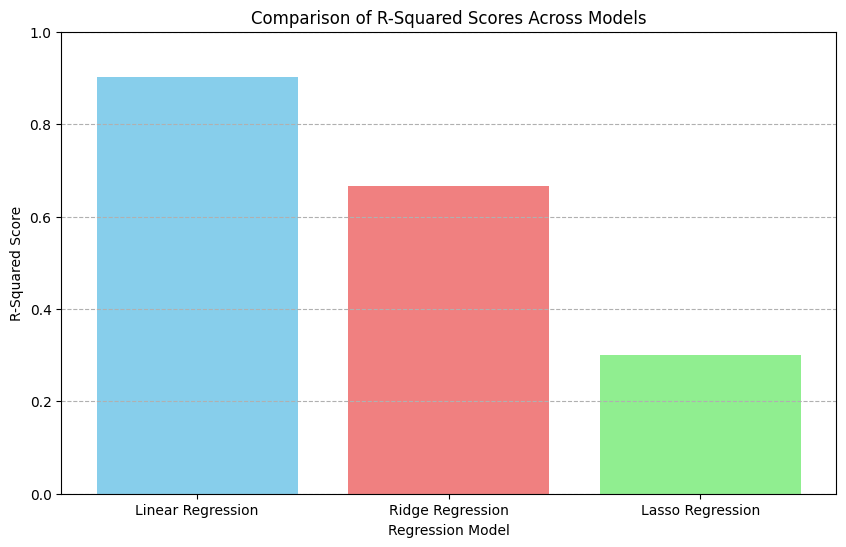

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(comparison_df.index, comparison_df['R-Squared'], color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Regression Model')
plt.ylabel('R-Squared Score')
plt.title('Comparison of R-Squared Scores Across Models')
plt.ylim(0, 1) # R-squared typically ranges from 0 to 1
plt.grid(axis='y', linestyle='--')
plt.show()


## Summary:

### Q&A
The key takeaways from implementing and comparing Linear, Ridge, and Lasso Regression models are as follows:

*   **Simple Linear Regression** is best suited for scenarios where a clear, direct relationship exists between one input and one output, similar to following a simple recipe.
*   **Ridge Regression** acts like "brakes" for models, preventing them from being overly influenced by noisy or highly correlated data, leading to more stable predictions, especially in complex situations.
*   **Lasso Regression** serves as a "declutterer," automatically identifying and eliminating irrelevant factors by setting their influence to zero, resulting in a simpler, more interpretable model that focuses on the most important predictors.

### Data Analysis Key Findings

*   **Introduction to Supervised Learning:** Supervised Learning was introduced using a "Teacher-Student" analogy, where the computer model (teacher) learns from data (textbook) that comes with answers (labels) to predict new information.
*   **Simple Linear Regression:**
    *   **Concept:** Explained as finding a straight line ($y = mx + c$) to predict one outcome from one factor, like a "Recipe for a Cake" where 'y' is the cake (Salary) and 'x' is an ingredient (Years of Experience).
    *   **Performance (Salary Prediction):** Achieved a high "accuracy score" (R-squared) of approximately 0.90, explaining about 90% of the variance in salary, with a "mistake score" (Mean Squared Error) of about 49.8 million.
*   **Ridge Regression:**
    *   **Concept:** Described as adding "brakes" to a model to prevent it from getting "too excited" by noisy data or many overlapping factors, making predictions more stable (e.g., predicting House Prices).
    *   **Performance (House Price Prediction):** Showed an "accuracy score" (R-squared) of approximately 0.67 and a "mistake score" (Mean Squared Error) of 24.48.
*   **Lasso Regression:**
    *   **Concept:** Introduced as a "Declutterer" that sets the influence of "useless information" (irrelevant features) to zero, helping simplify models, particularly when predicting Athlete Salaries from many potential factors.
    *   **Performance (Athlete Salary Prediction):** Identified and effectively ignored features like 'Years', 'CHits', and 'CHmRun' by setting their coefficients to zero. It yielded an "accuracy score" (R-squared) of approximately 0.30 and a "mistake score" (Mean Squared Error) of about 126,530.56.
*   **Model Comparison:**
    *   **Linear Regression** demonstrated the highest "accuracy score" (R-squared = 0.90) for the simple salary prediction task, indicating excellent fit where a clear linear relationship exists.
    *   **Ridge Regression** achieved a moderate "accuracy score" (R-squared = 0.67) for predicting house prices, showcasing its ability to handle more complex datasets.
    *   **Lasso Regression** had the lowest "accuracy score" (R-squared = 0.30) for athlete salary prediction in this specific setup, but effectively performed feature selection.

### Insights or Next Steps

*   The choice of regression model significantly impacts performance based on the data's complexity and the specific goal. Simple Linear Regression excels with straightforward relationships, while Ridge and Lasso provide crucial benefits like stability and feature selection for more intricate problems.
*   Further optimization of Ridge and Lasso models, such as tuning their `alpha` parameter, could potentially improve their "accuracy scores" and refine their ability to manage overfitting and select features in complex datasets.
